In [1]:

import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder

Importing the data from CSV file

In [2]:
data = pd.read_csv('Covid Dataset.csv')
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


Analyzing the features data

In [3]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [4]:
data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [5]:
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [6]:
for col in data:
    print(f'{col} : {data[col].unique()}')
    print()
    

Breathing Problem : ['Yes' 'No']

Fever : ['Yes' 'No']

Dry Cough : ['Yes' 'No']

Sore throat : ['Yes' 'No']

Running Nose : ['Yes' 'No']

Asthma : ['No' 'Yes']

Chronic Lung Disease : ['No' 'Yes']

Headache : ['No' 'Yes']

Heart Disease : ['No' 'Yes']

Diabetes : ['Yes' 'No']

Hyper Tension : ['Yes' 'No']

Fatigue  : ['Yes' 'No']

Gastrointestinal  : ['Yes' 'No']

Abroad travel : ['No' 'Yes']

Contact with COVID Patient : ['Yes' 'No']

Attended Large Gathering : ['No' 'Yes']

Visited Public Exposed Places : ['Yes' 'No']

Family working in Public Exposed Places : ['Yes' 'No']

Wearing Masks : ['No']

Sanitization from Market : ['No']

COVID-19 : ['Yes' 'No']



There is only one value for the features 'Wearing Masks' and 'Sanitization from Market', so it does not show any effect on the predictand removing those columns

In [7]:
data = data.drop(['Wearing Masks','Sanitization from Market'], axis = 1)

Endcoding all the features values with help of Label Encoder

In [8]:
#connvert categorical data into dummy indicators
columns = data.columns

cat_col=data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)
encoder = LabelEncoder()

#intiate LabelEncoder
for col in cat_col:
    data[col] = pd.DataFrame(encoder.fit_transform(data[[col]]))

['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'COVID-19']


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Checking the values after encoding

In [9]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


Plotting heatmap with corelations to identify and deal with weakly correlated values

<AxesSubplot:>

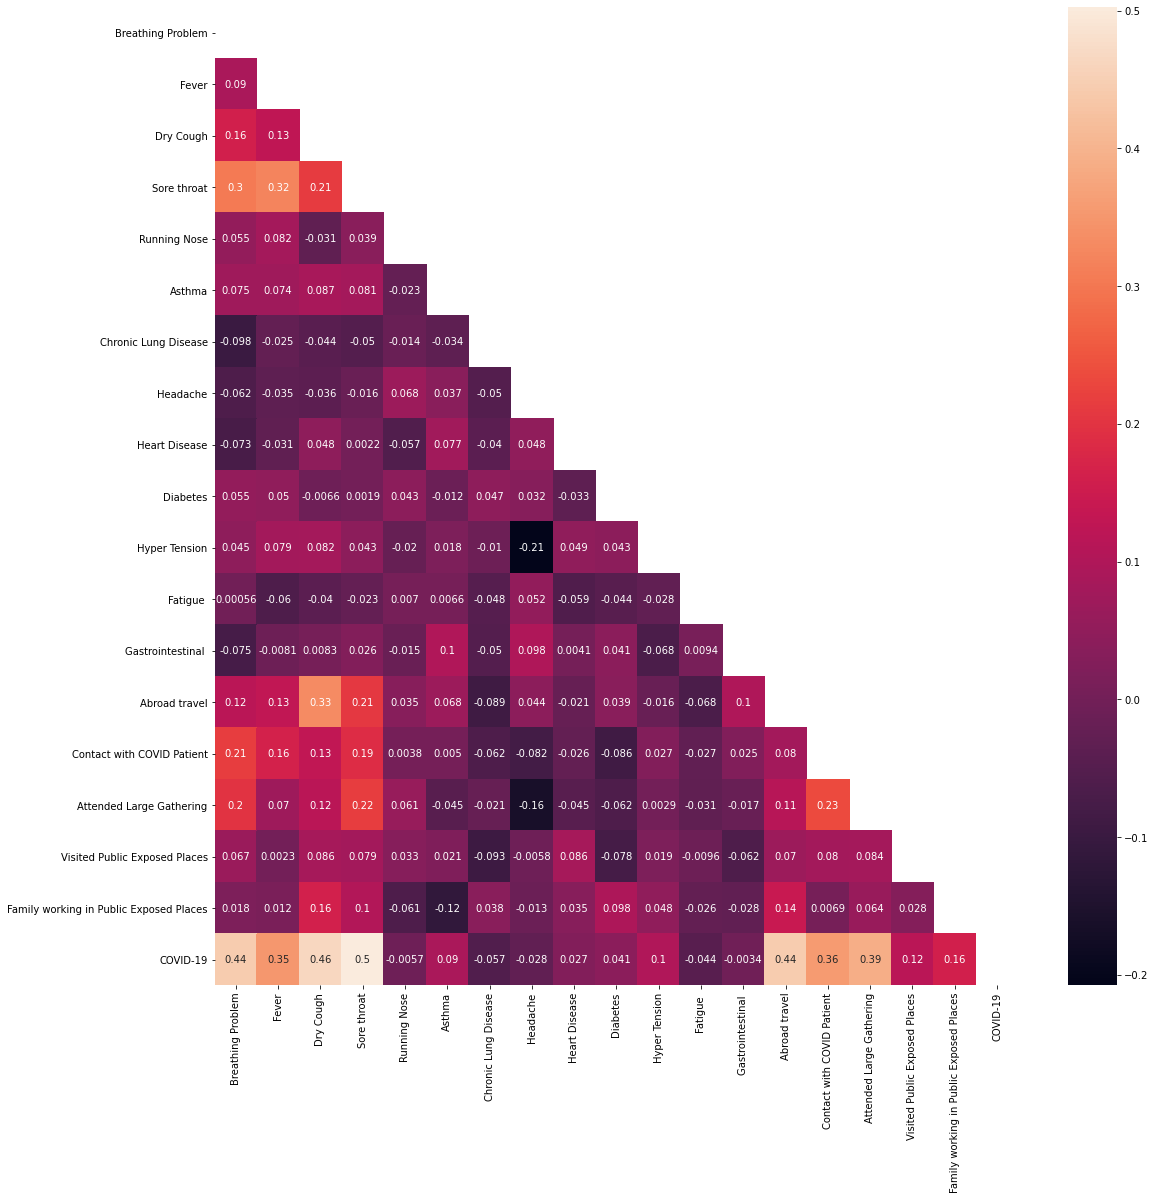

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(18,18))
sb.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Running nose,Headache, Heart disease, Fatigue and Gastrointestinal features have a very less correlation with the predictand(COVID-19). So removing them from the Dataframe before we develop model

In [11]:
data = data.drop(['Running Nose','Headache','Heart Disease','Fatigue ','Gastrointestinal '],axis = 1)
print(data.shape)
data.head()

(5434, 14)


,Breathing Problem,Fever,Dry Cough,Sore throat,Asthma,Chronic Lung Disease,Diabetes,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,0,0,1,1,0,1,0,1,1,1
1,1,1,1,1,1,1,0,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,1,0,1,0,1,0,1,1,0,1
4,1,1,1,1,0,1,1,1,0,1,0,1,0,1


Checking the distribution of predictant(COVID-19) values to check if the data is biased or not

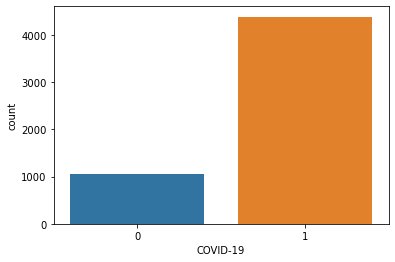

In [12]:
sb.countplot(x = 'COVID-19', data = data)
plt.show()

From the above countplot, the values 0 and 1 are not equally distributed and data is biased towards 1. 

Using Smote algorithm to overcome the issues of imbalenced data on COVID-19 column and
Splitting the data for training and testing

In [13]:
from sklearn.model_selection import train_test_split
y = data['COVID-19'].values
X= data.drop(columns=['COVID-19'],axis=1).values

from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print('Before',counter)

smt = SMOTE()

X, y = smt.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

counter = Counter(y)
print('After',counter)

Before Counter({1: 4383, 0: 1051})
After Counter({1: 4383, 0: 4383})


If imlearn is not installed.. Run this command to install -> conda install -c conda-forge imbalanced-learn

Developing the model with the train data after smoting and finding the predictands for test data

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)


Importing the f1_score metrics method and checking the metrics score for y_pred

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, zero_division=1)

0.8070898598516075

Implementing Random forest algorithm for the training data

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=13,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(random_state=0)
y_pred_rand = clf.fit(X_train, y_train).predict(X_test)

Checking f1 score for prediction values

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rand, zero_division=1)

0.6668202764976958

Ramdom forest got the  mertics score of 0.66

Checking the columns order and taking corresponding values from the user to predict his condition

In [18]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Chronic Lung Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [19]:
questions = [
{'ques':'Can I save details provided by you? Y/N '},
{'ques':'Do you have any Breathing problem? Y/N '},
{'ques':'Do you have Fever? Y/N '},
{'ques':'Do you have Dry Cough? Y/N '},
{'ques':'Do you have Sore throat? Y/N '},
{'ques':'Do you have Asthma? Y/N '},
{'ques':'Do you have Chronic Lung Disease? Y/N '},
{'ques':'Do you have Diabetes? Y/N '},
{'ques':'Do you have Hyper Tension? Y/N '},
{'ques':'Have you travelled Abroad recently? Y/N '},
{'ques':'Do you have any Contact with COVID Patient? Y/N '},
{'ques':'Have you Attended Large Gathering recently? Y/N '},
{'ques':'Have you Visited Public Exposed Places recently? Y/N '},
{'ques':'Do you have any Family member working in Public Exposed Places? Y/N '}
 ]

symp = []


def translate(answer):
    res = answer
    if res.lower() == 'y' or  res.lower() == 'yes':
        return 1
    elif res.lower() == 'n' or res.lower() == 'no':
        return 0
    else:
        return -1

                
def predict(symp):
    global y_pred
    
    x=np.array([symp])

    y_pred = gnb.predict(x)
    y_prob = gnb.predict_proba(x)
    
    response = ''

    if y_pred[0] == 0:
        response = f'You do not have any symptoms of COVID-19. Stay safe! Stay home!. The chances that you are not affected with COVID-19 is{round(y_prob[0][0]*100)}%'
    else:
        response = f'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14days!. The chances that you are affected with COVID-19 is {round(y_prob[0][1]*100)}%'
    return response

def load_data(answers):
    if answers[0] == 1:
        user_data = pd.DataFrame(np.array(answers).reshape(1,15), columns = ['Can I save details provided by you?'
        ,'Do you have any Breathing problem?','Do you have Fever?','Do you have Dry Cough?'
        ,'Do you have Sore throat?','Do you have Asthma?','Do you have Chronic Lung Disease?','Do you have Diabetes?',
        'Do you have Hyper Tension?','Have you travelled Abroad recently?','Do you have any Contact with COVID Patient?',
        'Have you Attended Large Gathering recently?','Have you Visited Public Exposed Places recently?',
        'Do you have any Family member working in Public Exposed Places?','Covid Yes/No'])
        
        user_data.to_csv('user_data_covid.csv', mode='a', index=False, header=False)

Taking some random values from test data set to use those values as reference to check chatbot  prediction accuracy

In [20]:
print(X_test[180])
print(y_test[180])

[1 1 0 1 1 0 1 0 0 1 0 0 0]
0


Implementing in GUI

In [21]:
#import files
from flask import Flask, render_template, request

In [22]:
app = Flask(__name__)
counter = 0
answers = []
@app.route("/")
def welcome():    
    return render_template("home.html") 
@app.route("/get")
def get_bot_response():    
    userText = request.args.get("msg")
    global counter
    global answers
    reply = ''
    res = translate(userText)
#     print("counter = ",counter)
    if counter == 0:
        counter = counter + 1
        reply = questions[counter-1]['ques']
    elif counter > len(questions)+1:
        return "stop"
    elif res == 1 or res == 0:    
        answers.append(res)
        counter = counter + 1
        if counter == len(questions)+1:
            reply = predict(answers[1:])
            answers.append(y_pred[0])
            load_data(answers)
            counter = counter + 1
        else:
            reply = questions[counter-1]['ques']

    else:
        reply = 'Incorrect answer! Please enter (Y/N)'+ questions[counter-1]['ques']
    return reply 
if __name__ == "__main__": 

    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Aug/2021 08:33:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:44] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Aug/2021 08:33:49] "GET /get?msg=Hey HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:52] "GET /get?msg=yes HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:53] "GET /get?msg=n HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:55] "GET /get?msg=n HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:58] "GET /get?msg=n HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:33:59] "GET /get?msg=y HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:01] "GET /get?msg=y HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:03] "GET /get?msg=y HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:04] "GET /get?msg=n HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:08] "GET /get?msg=y HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:09] "GET /get?msg=n HTTP/1.1" 200 -
127.0.0.1 - - [16/Aug/2021 08:34:11] "GET /get